In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Target labels:  [3 2 4 8 8 7 9 9 6 0]


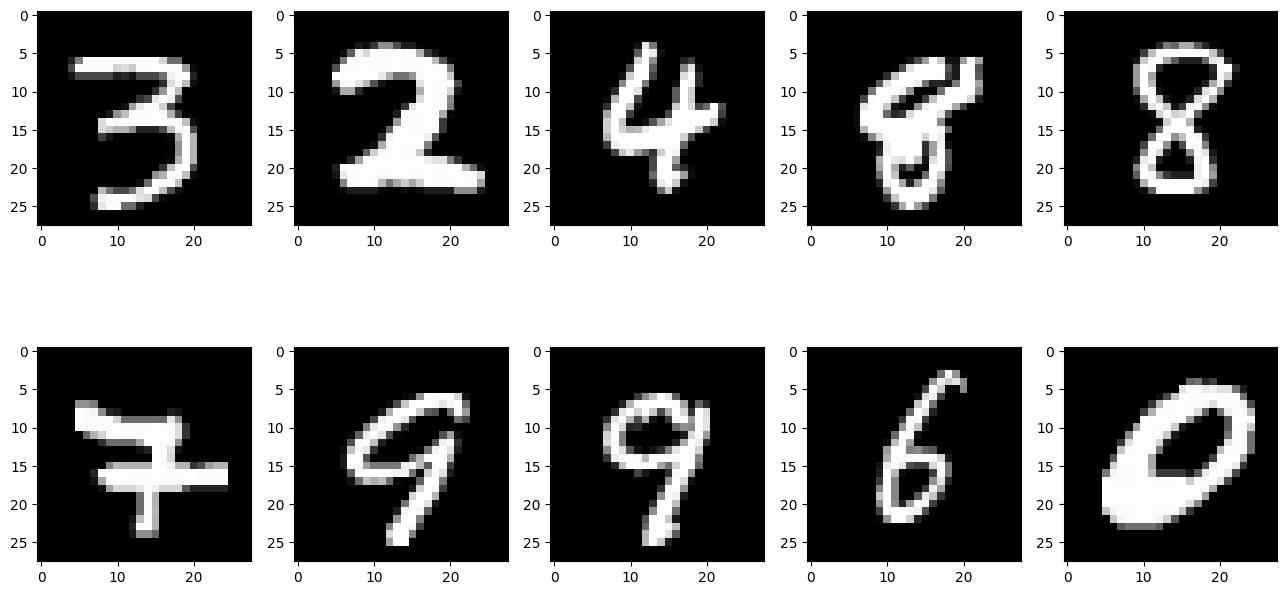

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2873 - accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1259 - accuracy: 0.9628
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0910 - accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0738 - accuracy: 0.9772
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0624 - accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0464 - accuracy: 0.9853
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0404 - accuracy: 0.9865
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0363 - accuracy: 0.9880
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.032

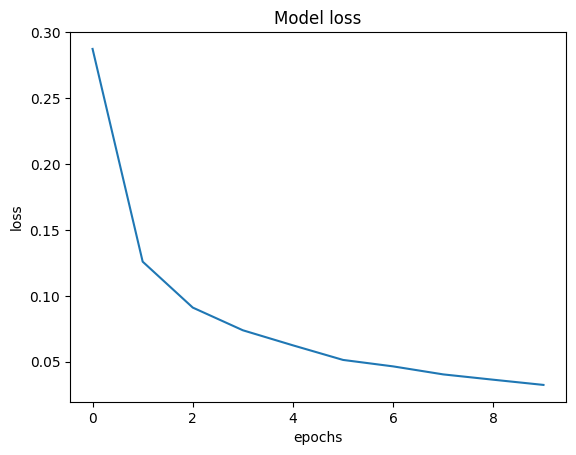

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

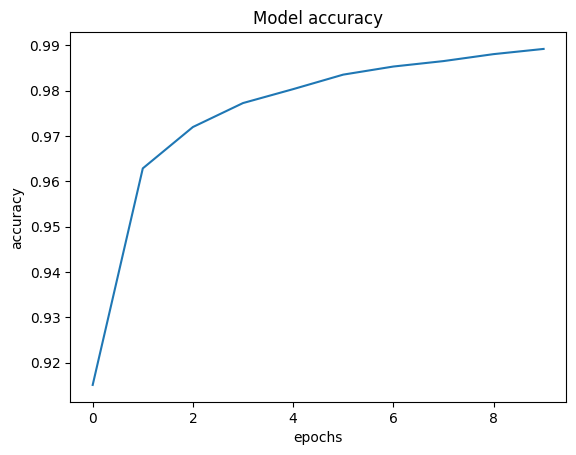

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0919 - accuracy: 0.9751
Loss of the Test dataset is: 0.0918889120221138
Accuracy of the test dataset is: 0.9750999808311462


In [11]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

a.	Improve the test accuracy of the model by changing the hyperparameters.

Epoch 1/20
937/937 [==============================] - 26s 26ms/step - loss: 0.5653 - accuracy: 0.8267
Epoch 2/20
937/937 [==============================] - 25s 26ms/step - loss: 0.2559 - accuracy: 0.9217
Epoch 3/20
937/937 [==============================] - 24s 25ms/step - loss: 0.1984 - accuracy: 0.9394
Epoch 4/20
937/937 [==============================] - 25s 26ms/step - loss: 0.1767 - accuracy: 0.9460
Epoch 5/20
937/937 [==============================] - 25s 26ms/step - loss: 0.1602 - accuracy: 0.9514
Epoch 6/20
937/937 [==============================] - 24s 26ms/step - loss: 0.1464 - accuracy: 0.9553
Epoch 7/20
937/937 [==============================] - 25s 26ms/step - loss: 0.1395 - accuracy: 0.9570
Epoch 8/20
937/937 [==============================] - 25s 26ms/step - loss: 0.1273 - accuracy: 0.9607
Epoch 9/20
937/937 [==============================] - 24s 26ms/step - loss: 0.1227 - accuracy: 0.9618
Epoch 10/20
937/937 [==============================] - 24s 26ms/step - loss: 0.119

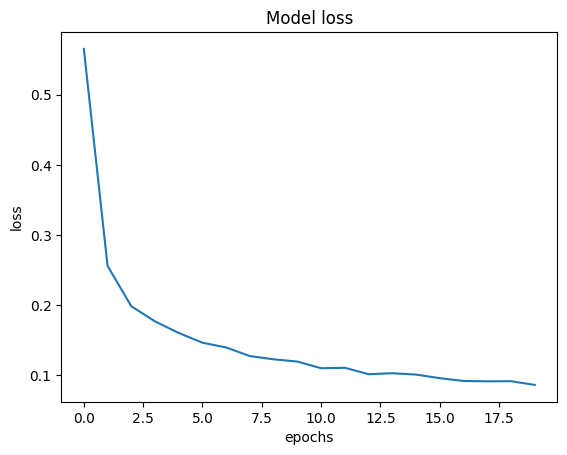

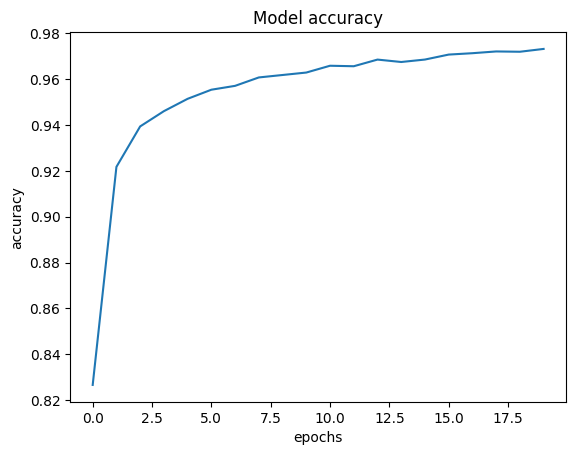

313/313 [==============================] - 1s 2ms/step - loss: 0.0585 - accuracy: 0.9805
Loss of the Test dataset is: 0.058478765189647675
Accuracy of the test dataset is: 0.9804999828338623


In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reshape the data to have 4 dimensions (batch_size, height, width, channels)
new_train_data = new_train_data.reshape(-1, 28, 28, 1)
new_test_data = new_test_data.reshape(-1, 28, 28, 1)

# Define a more complex model
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
datagen.fit(new_train_data)

# Train the model with augmented data
train_info = model.fit(datagen.flow(new_train_data, new_train_target, batch_size=64),
                       steps_per_epoch=len(new_train_data) / 64, epochs=20)

# Plot loss and accuracy
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

# Evaluate the model on the test dataset
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')


In [14]:
from tensorflow.keras.regularizers import l1, l2

model = Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
model.add(Dense(64, input_dim=64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, input_dim=64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, input_dim=32, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


313/313 [==============================] - 1s 3ms/step


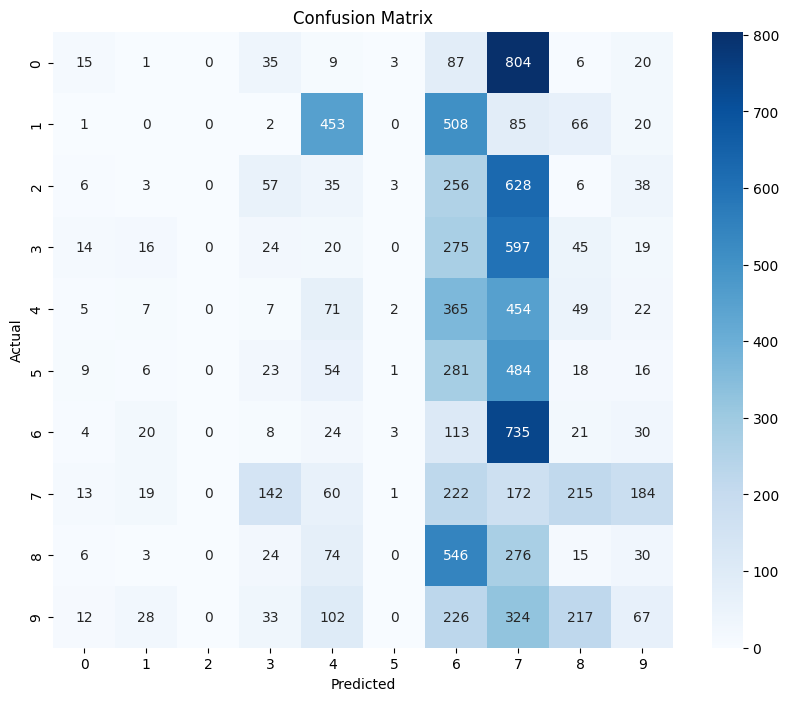

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get model predictions
predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(test_target, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
